In [29]:
!pip install pyvinecopulib


In [30]:
!pip install scikit-gstat


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skgstat as skg
import pyvinecopulib as pv


In [32]:
#load in data (same as in spcopula demo)
src = skg.data.meuse(variable='zinc')

coords, vals = src.get('sample')

# make a dataframe
df = pd.DataFrame({'x': coords[:, 0], 'y': coords[:, 1], 'zinc': vals.flatten()})
df.head()

,x,y,zinc
0,181072,333611,1022
1,181025,333558,1141
2,181165,333537,640
3,181298,333484,257
4,181307,333330,269


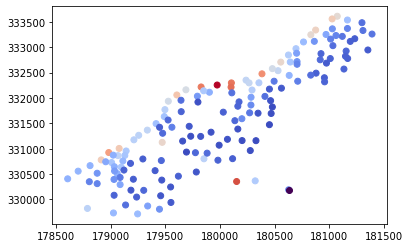

In [33]:
#create a scatter plot of the zinc value in the coordinatess
plt.scatter(df["x"],df["y"], c=df["zinc"], cmap=plt.cm.coolwarm)
plt.scatter(df["x"][154],df["y"][154], c=df["zinc"][154])

In [34]:
#calculate rank 
# needed for expressing the values of zinc in [0,1]
# which is crucial for the copulas
def zinc_to_rank(zinc = df.rank()["zinc"]):
    df_rank = zinc/(len(zinc)+1)
    
    plt.hist(df_rank)
    return(df_rank)

,x,y,zinc,rank
0,181072,333611,1022,0.897436
1,181025,333558,1141,0.935897
2,181165,333537,640,0.724359
3,181298,333484,257,0.423077
4,181307,333330,269,0.448718
...,...,...,...,...
150,179184,330182,166,0.144231
151,179085,330292,496,0.628205
152,178875,330311,342,0.512821
153,179466,330381,162,0.134615


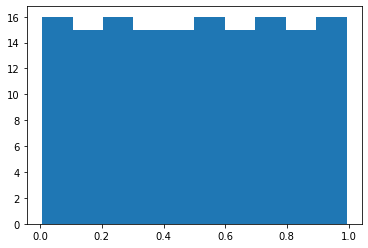

In [35]:
# add the rank column to the original dataframe
df["rank"] = zinc_to_rank(df.rank()["zinc"])
df

In [36]:
# calculate distances between all pairs of points

from scipy.spatial import distance_matrix
df_coordinates = df[["x","y"]]
distance_array = distance_matrix(df_coordinates, df_coordinates)

# convert the distnace matrix into a dataframe for easier access

distance_df = pd.DataFrame(distance_array)
distance_df


,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,0.000000,70.837843,118.848643,259.239272,366.314073,473.629602,258.321505,252.049598,380.189426,471.008492,...,4304.014173,4385.565870,4425.191182,4194.974374,4077.205538,3914.407363,3868.323926,3964.443088,3607.233843,3449.821155
1,70.837843,0.000000,141.566239,282.851551,362.640318,471.199533,234.401365,195.010256,328.867755,441.530293,...,4236.122756,4316.784220,4355.550137,4126.296645,4007.817486,3845.342247,3798.730841,3894.291848,3538.899546,3391.434505
2,118.848643,141.566239,0.000000,143.171226,251.023903,356.866922,167.000000,222.081066,323.513524,375.033332,...,4278.052010,4365.122793,4411.447155,4173.908121,4061.434476,3896.201483,3854.403326,3956.156721,3584.262407,3389.963569
3,259.239272,282.851551,143.171226,0.000000,154.262763,242.156974,175.171345,296.786118,347.351407,322.818835,...,4292.750750,4386.465206,4440.764349,4194.687712,4088.695146,3920.739726,3884.100024,3992.349935,3603.447377,3361.647959
4,366.314073,362.640318,251.023903,154.262763,0.000000,108.577162,147.526269,281.937936,266.101484,178.518907,...,4162.607356,4260.340127,4319.896411,4068.314639,3966.640014,3796.976824,3763.871411,3876.723488,3476.475514,3212.786952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,3914.407363,3845.342247,3896.201483,3920.739726,3796.976824,3786.887904,3753.359162,3676.331051,3579.912988,3620.842443,...,471.958685,476.656060,536.660041,296.082759,183.619171,0.000000,147.989865,334.846233,345.144897,1443.022176
151,3868.323926,3798.730841,3854.403326,3884.100024,3763.871411,3757.931479,3714.900268,3633.511387,3540.952697,3589.008916,...,599.736609,562.318415,557.046677,405.097519,217.082933,147.989865,0.000000,210.857772,391.256949,1545.369859
152,3964.443088,3894.291848,3956.156721,3992.349935,3876.723488,3875.800046,3821.201513,3734.408655,3647.002194,3703.768081,...,702.359595,596.896138,497.033198,494.814107,276.524863,334.846233,210.857772,0.000000,595.131078,1756.173397
153,3607.233843,3538.899546,3584.262407,3603.447377,3476.475514,3462.718152,3438.127688,3365.864673,3265.476382,3299.412827,...,702.659235,784.390209,880.273253,592.150319,528.674758,345.144897,391.256949,595.131078,0.000000,1176.606136


In [37]:
# find all pairs of locations that have a distance less than cutoff
cutoff_value = 1200
list_cutoff = np.argwhere(np.logical_and(distance_array < cutoff_value, distance_array > 0))
list_cutoff

# remove duplicate rows
list_cutoff_nodupe=[]
for row in list_cutoff:
    #ensure there are no duplicates
    if (row[0]<row[1]):
        list_cutoff_nodupe.append(row)
len(list_cutoff_nodupe)

# Create a new dataframe with the pairs of locations (cuttoff and no duplicates)
df_cutoff = pd.DataFrame(list_cutoff_nodupe, columns=["index1", "index2"])
df_cutoff

#add distances to the dataframe for each pair of locations
values = []

for index, row in df_cutoff.iterrows():
    values.append(distance_array[row["index1"]][row["index2"]])

df_cutoff["distance"] = values

# add zinc1 and zinc2 as values of zinc for index1 and index2
df_cutoff["zinc_rank1"] = list(df["rank"][(df_cutoff["index1"])])
df_cutoff["zinc_rank2"] = list(df["rank"][(df_cutoff["index2"])])

df_cutoff.head()

,index1,index2,distance,zinc_rank1,zinc_rank2
0,0,1,70.837843,0.897436,0.935897
1,0,2,118.848643,0.897436,0.724359
2,0,3,259.239272,0.897436,0.423077
3,0,4,366.314073,0.897436,0.448718
4,0,5,473.629602,0.897436,0.461538


In [38]:
# bin the values according to distance 
num_bins = 10
bin_values, bin_intervals = pd.cut(df_cutoff["distance"], bins = num_bins,
                                   labels = range(0,num_bins),
                                   retbins=True)
df_cutoff["bins"] = bin_values
df_cutoff

,index1,index2,distance,zinc_rank1,zinc_rank2,bins
0,0,1,70.837843,0.897436,0.935897,0
1,0,2,118.848643,0.897436,0.724359,0
2,0,3,259.239272,0.897436,0.423077,1
3,0,4,366.314073,0.897436,0.448718,2
4,0,5,473.629602,0.897436,0.461538,3
...,...,...,...,...,...,...
5224,150,153,345.144897,0.144231,0.134615,2
5225,151,152,210.857772,0.628205,0.512821,1
5226,151,153,391.256949,0.628205,0.134615,3
5227,152,153,595.131078,0.512821,0.134615,4


In [39]:
# find the mean value for each bin
bin_means = df_cutoff[["distance","bins"]].groupby('bins').mean()

# Store the means in a list
bin_means_list = np.concatenate((bin_means.values)).tolist()


In [40]:
#make separate dataframes for each bin
bins_data = []
for i in range(0, num_bins):
    bins_data.append(df_cutoff[df_cutoff["bins"]==(i)])
bins_data[0]

,index1,index2,distance,zinc_rank1,zinc_rank2,bins
0,0,1,70.837843,0.897436,0.935897,0
1,0,2,118.848643,0.897436,0.724359,0
37,1,2,141.566239,0.935897,0.724359,0
76,2,3,143.171226,0.724359,0.423077,0
113,3,4,154.262763,0.423077,0.448718,0
...,...,...,...,...,...,...
5106,138,139,137.786066,0.602564,0.474359,0
5132,139,151,141.000000,0.474359,0.628205,0
5144,140,150,145.602198,0.214744,0.144231,0
5173,143,144,125.031996,0.570513,0.615385,0


In [41]:
#calculate kendallstau per bin
from scipy import stats

kendall_list = []
for bin_data in bins_data:
    kendall_list.append(stats.kendalltau(bin_data["zinc_rank1"], bin_data["zinc_rank2"])[0])
    


In [42]:
def fit_model_kendall(bin_means_list, kendall_list, cutoff, degree=3):
    
    model = np.polyfit(bin_means_list, kendall_list, degree)
    predict = np.poly1d(model)
    
    
    #predict the kendall's tau for each bin
    kendall_list_predict = predict(bin_means_list)
    x_lin_reg = range(0, cutoff)
    y_lin_reg = predict(x_lin_reg)
    if (len(bin_means_list) > 2): 
        plt.scatter(bin_means_list, kendall_list)
        plt.plot(x_lin_reg, y_lin_reg, c = 'g')
    return(predict, kendall_list_predict)#if we return the model to use to predict here


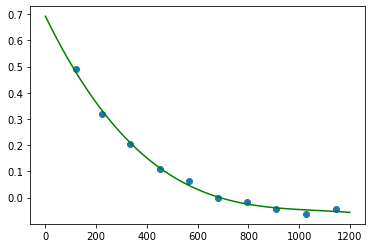

In [43]:
model_predict, kendall_list_predict = fit_model_kendall(bin_means_list, kendall_list, cutoff_value)

In [44]:
import pyvinecopulib as pv
import numpy as np

def bins_to_cop(bins_data, family_set, kendall_tau_predict):
    
    cops=[]

    # loop over the bins
    for i in range(0, len(bins_data)):

        # define the data u1 and u2 from the ranks
        rank1 = np.array(bins_data[i]["zinc_rank1"])
        rank2 = np.array(bins_data[i]["zinc_rank2"])
        data = np.stack((rank1,rank2), axis = 0 ).T

        # define the family set and fitting method
        controls = pv.FitControlsBicop(family_set=family_set,
                                       parametric_method="itau")

        # append the current copula to the list of copulas
        cops.append(pv.Bicop(data = data, controls=controls))

        # set the parametrs to the optimal parameter according 
        # to the predicted kendall's tau
        cops[i].parameters = cops[i].tau_to_parameters(kendall_tau_predict[i])

    return(cops)

In [45]:
# define the family set as all the families that can be fitter through tau
family_set = [ pv.BicopFamily.indep, pv.BicopFamily.gaussian,  
               pv.BicopFamily.clayton, pv.BicopFamily.gumbel, pv.BicopFamily.frank, pv.BicopFamily.joe]
# 
cops = bins_to_cop(bins_data, family_set, kendall_list_predict)
cops

[<pyvinecopulib.Bicop>
 Gumbel 180°, parameters = 1.91933,
 <pyvinecopulib.Bicop>
 Gumbel 180°, parameters = 1.50444,
 <pyvinecopulib.Bicop>
 Clayton, parameters = 0.527139,
 <pyvinecopulib.Bicop>
 Clayton, parameters = 0.256012,
 <pyvinecopulib.Bicop>
 Independence,
 <pyvinecopulib.Bicop>
 Independence,
 <pyvinecopulib.Bicop>
 Independence,
 <pyvinecopulib.Bicop>
 Clayton 90°, parameters = 0.0811996,
 <pyvinecopulib.Bicop>
 Clayton 90°, parameters = 0.0981907,
 <pyvinecopulib.Bicop>
 Joe 270°, parameters = 1.0967]

WE ARE DONE WITH COPULAS NOW, WE NEED TO DO THE NEIGHBOURHOOD AND CONDITIONAL NEIGHBOURHOOD


In [46]:
# now find the neighbours 
def build_neighbourhood(dataframe, neighbourhood_size=5):
    neigh_list = []
    for i in range(0,155):
        neigh_list.append(dataframe[dataframe["index1"]==(i)].sort_values(by=['distance']).head(neighbourhood_size))

    return(neigh_list)

In [47]:
#We are back to the original dataset with original distances
#distance_array
list_of_indexes = np.argwhere(distance_array > 0)
list_of_indexes.shape

(23870, 2)

In [48]:
# now we are working with the whole dataset (not cutoff)
df_whole = pd.DataFrame(list_of_indexes, columns=["index1", "index2"])

distance_value = []

for index, row in df_whole.iterrows():
    distance_value.append(distance_array[row["index1"]][row["index2"]])

df_whole["zinc_rank1"] = list(df["rank"][(df_whole["index1"])])
df_whole["zinc_rank2"] = list(df["rank"][(df_whole["index2"])])
df_whole["distance"] = distance_value
df_whole.head()

,index1,index2,zinc_rank1,zinc_rank2,distance
0,0,1,0.897436,0.935897,70.837843
1,0,2,0.897436,0.724359,118.848643
2,0,3,0.897436,0.423077,259.239272
3,0,4,0.897436,0.448718,366.314073
4,0,5,0.897436,0.461538,473.629602


In [49]:
# build the neighbourhoods (sorted by distance) and store them in a list
neigh_size = 20
list_neighbourhood = build_neighbourhood(df_whole, neigh_size)
list_neighbourhood[0]

,index1,index2,zinc_rank1,zinc_rank2,distance
0,0,1,0.897436,0.935897,70.837843
1,0,2,0.897436,0.724359,118.848643
6,0,7,0.897436,0.576923,252.049598
5,0,6,0.897436,0.525641,258.321505
2,0,3,0.897436,0.423077,259.239272
11,0,12,0.897436,0.923077,336.434243
3,0,4,0.897436,0.448718,366.314073
12,0,13,0.897436,0.634615,373.483601
7,0,8,0.897436,0.532051,380.189426
82,0,83,0.897436,0.455128,399.656102


In [50]:
def distance_to_bin(distance, bin_means_list):
    if (len(bin_means_list)>1):
        iwidth = bin_means_list[1] - bin_means_list[0]
    else:
        return (0)
    bin_result = np.searchsorted(bin_means_list, distance, side='right')
    #bin_result = np.clip(bin_result, 0, 9)
    #print ("Your element belongs in bin: ", bin_result)
    return(bin_result)

#distances = [0, 100, 200, 300, 350, 400, 500, 600,650, 700, 800] #df_cutoff["distance"].iloc(0)[0]

#for distance in distances:
#    bin_result = distance_to_bin(distance) #number of bin

In [51]:
def bin_to_copulas(bin_result, bin_means_list, curr_distance):
    
    # find copula indx and lambda from the bin result
    if (bin_result == 0):
        copula_idx = (0, 0)
        curr_lambda = 1
    elif (bin_result == len(bin_means_list)):
        copula_idx = (len(bin_means_list)-1, len(bin_means_list)-1)
        curr_lambda = 1
    else:
        copula_idx = (bin_result - 1, bin_result)
        curr_lambda = (curr_distance - bin_means_list[copula_idx[0]]) / (bin_means_list[copula_idx[1]] - bin_means_list[copula_idx[0]])
    
    return copula_idx, curr_lambda #copula_idx is a tuple (0,1) and curr_lamba is a number
    #print(copula1_idx, copula2_idx, curr_lambda)

In [52]:
def calc_hfunc(curr_lambda, copula1, copula2, row):
    hfunc_value = ((1 - curr_lambda) * copula1.hfunc1([[row["zinc_rank1"],row["zinc_rank2"]]])[0])  \
            + (curr_lambda * copula2.hfunc1([[row["zinc_rank1"],row["zinc_rank2"]]])[0])

    return hfunc_value

In [53]:
def build_next_neighbourhood(list_neighbourhood, bin_means_list, cops, model):  
    #list_neighbourhood_hfunc=[]
    list_neighbourhood_updated =[]

    for neigh in list_neighbourhood:

        # pass in the rows, one by one in the hfucn1
        
        list_hfunc = []
        for i, row in neigh.iterrows():

            # check which bin the row belongs in
            bin_result = distance_to_bin(row["distance"], bin_means_list) 
            # calculate copulaidx and lambda
            copulas_idx, curr_lambda = bin_to_copulas(bin_result, bin_means_list, row["distance"])
            
            copula1, copula2 = cops[copulas_idx[0]], cops[copulas_idx[1]]
            copula1.parameters = copula1.tau_to_parameters(model(row["distance"]))
            copula2.parameters = copula2.tau_to_parameters(model(row["distance"]))
            
            # now use the copulas to calculate hfunc
            hfunc_value = calc_hfunc(curr_lambda, copula1, copula2, row)
            if curr_lambda > 1:
                print(curr_lambda, copulas_idx, row)
                print(bin_means_list[copulas_idx[0]], bin_means_list[copulas_idx[1]])
                print("error")
            # append to current neighbourhood list
            list_hfunc.append(hfunc_value)
  
        # add hfunc column
        neigh["hfunc"] = list_hfunc
        # drop everything but the index of the neighbour and value of hfunc
        neigh_temp = neigh[["index2", "hfunc"]]
        #list_neighbourhood_hfunc.append(neigh_temp)
        
######### build new neighbourhood

        list_neighbourhood_temp = []

        for i in range(1,neigh_temp.shape[0]):
            index1 = int(neigh_temp.iloc[[0]]["index2"])
            index2 = int(neigh_temp.iloc[[i]]["index2"])
            zinc_rank1 = float(neigh_temp.iloc[[0]]["hfunc"])
            zinc_rank2 = float(neigh_temp.iloc[[i]]["hfunc"])


            list_for_df = [index1, index2, distance_df[index1][index2], zinc_rank1, zinc_rank2]
            list_neighbourhood_temp.append(list_for_df)

        new_neigh_df = pd.DataFrame(list_neighbourhood_temp, columns=["index1","index2","distance", "zinc_rank1", "zinc_rank2"]  )
        list_neighbourhood_updated.append(new_neigh_df)
        
    return(list_neighbourhood_updated)



In [54]:
def list_neigh_to_bin_mean(list_neighbourhood_temp,cutoff_value_temp, num_bins=10, degree=3):
    df_whole_temp = pd.DataFrame()
    for neigh in list_neighbourhood_temp:
        df_whole_temp = pd.concat([df_whole_temp, neigh], ignore_index=True)
        
        
    # we do a cutoff  ######### we need to automise this
    #cutoff_value_temp = 600
    df_whole_temp_cut = df_whole_temp[df_whole_temp["distance"]<cutoff_value_temp]
    
    
    #num_bins = 10
    bin_values, bin_intervals = pd.cut(df_whole_temp_cut["distance"], bins = num_bins,
                                       labels = range(0, num_bins),
                                       retbins=True)

    df_whole_temp_cut.loc[:,("bins")] = list(bin_values)
    bin_means = df_whole_temp_cut[["distance","bins"]].groupby('bins').mean()
    
    
    bins_data = []
    kendall_list = []

    for i in range(0, num_bins):
        bins_data.append(df_whole_temp_cut[df_whole_temp_cut["bins"]==(i)])
        kendall_list.append(stats.kendalltau(df_whole_temp_cut[df_whole_temp_cut["bins"]==(i)]["zinc_rank1"],
                                              df_whole_temp_cut[df_whole_temp_cut["bins"]==(i)]["zinc_rank2"])[0])

    bin_means_list = np.concatenate((bin_means.values)).tolist()

    model_predict, kendall_list_predict = fit_model_kendall(bin_means_list, kendall_list, cutoff_value_temp, degree)
    
    return(bins_data, bin_means_list, kendall_list_predict, model_predict)

In [55]:
def spcopula_step(list_neighbourhood_curr, bin_means_curr, cops_curr, model_curr, cutoff=600, num_bins=10, degree=3 ):
    list_neighbourhood_next = build_next_neighbourhood(list_neighbourhood_curr, bin_means_curr, cops_curr, model_curr)
    bins_data_next, bin_means_list_next, kendall_list_predict_next, model_predict_next = list_neigh_to_bin_mean(list_neighbourhood_next, cutoff, num_bins, degree)
    cops_next = bins_to_cop(bins_data_next, family_set, kendall_list_predict_next)
    
    return(list_neighbourhood_next, bin_means_list_next, cops_next, model_predict_next)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

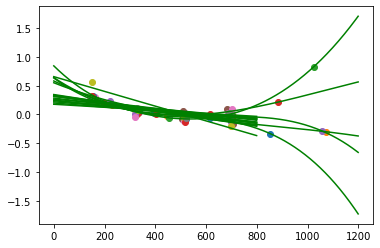

In [57]:
super_list_neighbourhood=[list_neighbourhood]
super_bin_means_list=[bin_means_list]
super_cops=[cops]
super_model_list = [model_predict]

num_bins_list = [8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
cutoff_list = [1000, 1200, 1200, 1200, 1200, 1200, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800]
degree_list = [2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

for i in range(1,neigh_size):
    super_list_neighbourhood_temp, super_bin_means_list_temp, super_cops_temp, super_model_temp = \
            spcopula_step(super_list_neighbourhood[i-1], super_bin_means_list[i-1],
                          super_cops[i-1], super_model_list[i-1], cutoff=cutoff_list[i], num_bins = num_bins_list[i],
                         degree = degree_list[i])
    super_list_neighbourhood.append(super_list_neighbourhood_temp)
    super_bin_means_list.append(super_bin_means_list_temp)
    super_cops.append(super_cops_temp)
    super_model_list.append(super_model_temp)


In [58]:
#now the big question is HOW DO WE PREDICT?
#probably? num_neighbourhood = 1
# we build the neighbourhood
# and we 

In [59]:
#  build a log normal, so that we have a different representation of zinc for testing
from scipy.stats import lognorm
import matplotlib.pyplot as plt
#ppf(q, s, loc=0, scale=1)

ln_mean = np.mean(np.log(df["zinc"]))
ln_std = np.std(np.log(df["zinc"]))
ln_mean_exp = np.exp(ln_mean)

frozen_lognorm = lognorm(s=ln_std, scale=ln_mean_exp)
zinc_ln = frozen_lognorm.cdf(df["zinc"])
df["zinc_ln"] = zinc_ln
df

,x,y,zinc,rank,zinc_ln
0,181072,333611,1022,0.897436,0.926547
1,181025,333558,1141,0.935897,0.945601
2,181165,333537,640,0.724359,0.788166
3,181298,333484,257,0.423077,0.319917
4,181307,333330,269,0.448718,0.342919
...,...,...,...,...,...
150,179184,330182,166,0.144231,0.141102
151,179085,330292,496,0.628205,0.672142
152,178875,330311,342,0.512821,0.471767
153,179466,330381,162,0.134615,0.133655


In [60]:
list_of_indexes = np.argwhere(distance_array > 0)
list_of_indexes.shape

(23870, 2)

In [61]:
# now we are working with the whole dataset (not cutoff)
df_whole_ln = pd.DataFrame(list_of_indexes, columns=["index1", "index2"])

distance_value = []

for index, row in df_whole_ln.iterrows():
    distance_value.append(distance_array[row["index1"]][row["index2"]])

df_whole_ln["zinc_ln1"] = list(df["zinc_ln"][(df_whole_ln["index1"])])
df_whole_ln["zinc_ln2"] = list(df["zinc_ln"][(df_whole_ln["index2"])])
df_whole_ln["distance"] = distance_value
df_whole_ln.head()

,index1,index2,zinc_ln1,zinc_ln2,distance
0,0,1,0.926547,0.945601,70.837843
1,0,2,0.926547,0.788166,118.848643
2,0,3,0.926547,0.319917,259.239272
3,0,4,0.926547,0.342919,366.314073
4,0,5,0.926547,0.365477,473.629602


In [62]:
# now we need to predict the mean with the expectation
# with the list_neighbourhood_ln as neighs
# df as our data train
# df as our data test
# super_cops for the copulas

In [63]:
# we might need this later 
# here we choose the number of neighbours we want for prediction
neigh_size = 20
list_neighbourhood_ln = build_neighbourhood(df_whole_ln, neigh_size)
list_neighbourhood_ln[154]

,index1,index2,zinc_ln1,zinc_ln2,distance
23833,154,117,0.522803,0.833383,353.004249
23797,154,81,0.522803,0.983606,503.135171
23824,154,108,0.522803,0.191288,799.335974
23823,154,107,0.522803,0.078518,848.958185
23818,154,102,0.522803,0.213093,870.917907
23817,154,101,0.522803,0.124486,914.617406
23784,154,68,0.522803,0.858013,986.887025
23822,154,106,0.522803,0.053712,1013.126349
23825,154,109,0.522803,0.286703,1038.171469
23816,154,100,0.522803,0.205142,1043.985153


In [64]:
dist_df_list = []
i = neigh_size 
spDepth = neigh_size 
for list_neigh in super_list_neighbourhood[0:spDepth]:
    temp_list=[]
    for neigh in list_neigh:
        #print(neigh[0:4]["distance"])
        temp_list.append(list(neigh[0:i]["distance"]))
    dist_df_list.append(pd.DataFrame(temp_list))
    i-=1
dist_df_list

[             0           1           2           3           4           5   \
 0     70.837843  118.848643  252.049598  258.321505  259.239272  336.434243   
 1     70.837843  141.566239  195.010256  234.401365  266.011278  282.851551   
 2    118.848643  141.566239  143.171226  167.000000  222.081066  251.023903   
 3    143.171226  154.262763  175.171345  242.156974  259.239272  282.851551   
 4    108.577162  147.526269  154.262763  178.518907  221.758878  244.296950   
 ..          ...         ...         ...         ...         ...         ...   
 150  117.038455  145.602198  147.989865  183.619171  217.117480  262.619497   
 151  116.361506  141.000000  147.989865  160.863296  210.857772  217.082933   
 152   81.412530  174.942848  205.000000  210.857772  242.866218  270.351623   
 153  158.294030  170.390727  195.747286  260.555176  260.823695  309.161770   
 154  353.004249  503.135171  799.335974  848.958185  870.917907  914.617406   
 
              6            7          

In [65]:
def build_xvalue(n):
    rat_temp = np.array([[1e-06, 1e-05, 1e-04, 1e-03]])
    rat_temp2 = np.array([[x for x in range(1,51)]])
    rat = rat_temp.T*rat_temp2
    rat_temp3 = np.array([x/n for x in range(1,n)])
    rat_inv = 1-rat
    rat_final = np.append(rat,rat_inv)
    rat_final = np.append(rat_final, rat_temp3)
    xvalue = np.sort(np.unique(rat_final.flatten()))
    
    return xvalue

In [66]:
def calc_hfunc_list(curr_lambda, copula1, copula2, u0temp):
    hfunc_value = ((1 - curr_lambda) * copula1.hfunc1(u0temp))  \
            + (curr_lambda * copula2.hfunc1(u0temp))
    return hfunc_value



In [67]:
def calc_pdf(curr_lambda, copula1, copula2, u0temp):
    pdf_value = ((1 - curr_lambda) * copula1.pdf(u0temp))  \
            + (curr_lambda * copula2.pdf(u0temp))

    return pdf_value

In [68]:
def dCopula(repCondVar, spVine, spDepth, models, h, nx):
    l0 = np.zeros(nx)
    u0 = repCondVar
    
    for spTree in range(0,spDepth):
        u1 = []
        curr_cops = spVine[spTree]
        curr_model = models[spTree]
        tmph = h[spTree]
        for i in range(0,len(tmph)):

            #calculate value to update l0
            u0temp = u0[:,[0,i+1]]

            curr_distance = tmph[i]
            # now we calculate the density of all pairs from u0temp 
            # we use the bins and appropriate copulas + lambdas

            # check which bin the row belongs in
            bin_result = distance_to_bin(curr_distance, super_bin_means_list[spTree]) 

            # calculate copulaidx and lambda
            copulas_idx, curr_lambda = bin_to_copulas(bin_result,  super_bin_means_list[spTree], curr_distance)
            
            copula1, copula2 = curr_cops[copulas_idx[0]], curr_cops[copulas_idx[1]]
            copula1.parameters = copula1.tau_to_parameters(curr_model(curr_distance))
            copula2.parameters = copula2.tau_to_parameters(curr_model(curr_distance))

            # now use the copulas to calculate hfunc
            pdf_value = calc_pdf(curr_lambda, copula1, copula2, u0temp)
            hfunc_value = calc_hfunc_list(curr_lambda, copula1, copula2, u0temp)

            l0 = l0 + np.log(pdf_value)
            u1.append(hfunc_value)

        # now we want to calculate u1 from u0
        u1 = np.array(u1)
        u0 = u1.T

    return(np.exp(l0))
        

In [69]:
#to start with condSpVine we need the information contained in list_neighbourhood_ln and dist_df_list
def condSpVine(condVar ,  h, spVine, models, n = 1000):
    #condVar is list neighbourhood
    
    xvalue = build_xvalue(n)
    nx = len(xvalue)
    
    repCondVar = np.append(np.reshape(xvalue, (len(xvalue), 1)), np.repeat(np.matrix(condVar), nx, axis = 0), axis = 1)
    
    density = dCopula(repCondVar, spVine, spDepth, models, h, nx)
    left = max(0, 2*density[0] - density[1])
    right = max(0, 2*density[nx-1] - density[nx-2])
    density_extended = np.append(np.append(left, density),right)
    
    return density_extended

In [70]:
h_temp_small = []
h_big = []
for i in range(155):
    for dataFrame in dist_df_list:
        h_temp_small.append(dataFrame.iloc[i])
    h_big.append(h_temp_small)
    h_temp_small = []


In [71]:
h_big[154]

[0      353.004249
 1      503.135171
 2      799.335974
 3      848.958185
 4      870.917907
 5      914.617406
 6      986.887025
 7     1013.126349
 8     1038.171469
 9     1043.985153
 10    1059.422484
 11    1081.399556
 12    1084.959446
 13    1105.635112
 14    1123.374381
 15    1141.763986
 16    1176.606136
 17    1176.930329
 18    1194.267139
 19    1242.502716
 Name: 154, dtype: float64,
 0      170.496334
 1      483.547309
 2      598.693578
 3      530.970809
 4      566.389442
 5      639.676481
 6      792.030934
 7      701.224643
 8      708.994358
 9      803.016812
 10     783.400919
 11     776.600927
 12     880.861510
 13     779.252206
 14     857.482944
 15     855.131569
 16     913.597833
 17     846.835285
 18    1039.161681
 Name: 154, dtype: float64,
 0     451.518549
 1     622.675678
 2     453.476571
 3     413.678619
 4     538.613962
 5     824.229337
 6     620.790625
 7     543.243960
 8     808.547463
 9     613.579661
 10    733.659321
 11  

In [72]:
from scipy import integrate

xvals=build_xvalue(1000)
xvals_extended = np.append(np.append([0], xvals),[1])

density_list = []
integration_constant_list = []
result_list = []
count=0
error_list=[]

for i in range(155):
    density = condSpVine(list_neighbourhood_ln[i]['zinc_ln2'], h_big[i], super_cops, super_model_list)
    density_list.append(density)
    integration_constant = integrate.simpson(density, xvals_extended)
    integration_constant_list.append(integration_constant)
    
    result = integrate.simpson(((frozen_lognorm.ppf(xvals_extended[0:len(xvals)]) * density[0:len(xvals)])/ integration_constant), xvals)
    result_list.append(result)
    if (result > 2000):
        print(i, result)
        error_list.append(result)
        count+=1
print("Final Result: " + str(np.median(abs(result_list - df["zinc"]))))    
print(count)

81 342464.76834108005
117 7803.985836924991
119 8333.847446792373
Final Result: 121.4606795533656
3


In [73]:
print("Final Result: " + str(np.mean(abs(result_list - df["zinc"]))))    


Final Result: 2482.8978353811067


In [74]:
df_result = pd.DataFrame()
df_result["zinc"] = df["zinc"] 
df_result["result"] = (result_list)
#df_result["result"] = df_result["result"]
df_result = df_result[~df_result['result'].isin(error_list)]


In [75]:
print(np.mean(abs(df_result["result"] - df_result["zinc"]))) #185 with 1 bucket every time

189.72738723206842


In [76]:
print(np.median(abs(df_result["result"] - df_result["zinc"])))

119.3702014256968


2.932853460145172e-25
503.6959066416813


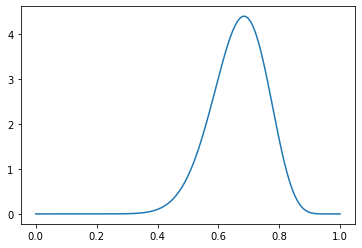

In [77]:
for i in [154]:
    plt.plot(xvals_extended, density_list[i]/integration_constant_list[i])
    print(integration_constant_list[i])
    print(result_list[i])

In [78]:
integration_const = np.sum((np.diff(xvals_extended)) * (0.5*np.diff(density)+density[0:len(density)-1]))
integration_const

2.9328534601451717e-25

In [79]:
np.diff(density)

array([ 4.09771739e-68,  1.08429620e-66,  7.12997659e-66, ...,
       -3.60859117e-73, -7.00334957e-75, -8.34162303e-78])

In [80]:
np.median(abs(result_list - df["zinc"]))

121.4606795533656

In [82]:
abs((df_result["result"] - df_result["zinc"])).describe()

count     152.000000
mean      189.727387
std       243.692940
min         1.677490
25%        51.164118
50%       119.370201
75%       221.082627
max      1738.465006
dtype: float64

In [ ]:
func = np.interp(xvals_extended, xvals_extended, density, left=None, right=None, period=None)
func

In [ ]:
plt.plot(xvals_extended, func, 'o')
plt.plot(xvals_extended, func, '-x')
plt.show()

In [ ]:
# we have the function we have the xvals
# we just need to multpily at every point in xvals
# the value of density 
#with the inverse of the cdf??  (quantile function)


In [ ]:
ln_mean = np.mean(np.log(df["zinc"]))
ln_std = np.std(np.log(df["zinc"]))
ln_mean_exp = np.exp(ln_mean)

frozen_lognorm = lognorm(s=ln_std, scale=ln_mean_exp)

In [ ]:
integrate.simpson((frozen_lognorm.ppf(xvals_extended[0:len(xvals)]) * func[0:len(xvals)]/ integration_const), xvals)

In [ ]:
ln_std

In [ ]:
 
model = np.polyfit( xvals_extended,density, 7)
predict = np.poly1d(model)


#predict the kendall's tau for each bin
#kendall_list_predict = predict(bin_means_list)
x_lin_reg = xvals_extended
y_lin_reg = predict(x_lin_reg)
plt.plot(x_lin_reg, y_lin_reg, c = 'g')

In [ ]:
list_neighbourhood_ln[154]['zinc_ln2']